# Predictions in New York City Car Accidents (Machine Learning)

## INFO 1998 Fall '23 Final Project

##### Shubham Mohole (sam 588)
##### Jerry Ji (rj378)
##### Bobby Zhang (bz292)

## Introduction

The following project will attempt to answer the following question through three visualizations and machine learning models: what causes car accidents, where do such accidents occur, and how does each factor correlate to non-vehicular casualties (i.e. pedestrians and cyclists)? The techniques used in this project will employ those machine learning techniques and models learned throughout the INFO 1998 course.

More specifically, we will have three visualizations: a pie chart with the percentage of casualties categorized by cause of the crash, a scatter plot of the location and cause of each crash for a vehicle, and finally, a correlation matrix which will help in our three ML models, which will be expanded on later in this project.

Sources

The following CSV dataset was obtained under a free and public use license, as hosted by Data.gov, and the project abides by the Terms of Use as outlined by NYC.gov and NYC OpenData.

The dataset can be found here: https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes

This dataset utilizes data collected from police reports (MV104-AN). These reports are completed after every collision in NYC when someone is injured or killed or where the damages exceed $1000. The following link is a template of such police reports: https://www.nhtsa.gov/sites/nhtsa.gov/files/documents/ny_overlay_mv-104an_rev05_2004.pdf


Hypothesis: Crashes that involve intoxication will occur in concentrated hotspots in downtown areas and will have a magnitude increase in the chance of mortality for pedestrians as compared to other causes, while the other causes of crashes, such as driver distraction, will be spread out in NYC, and but not be the main cause of casualties in NYC.



In [45]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px

In [46]:
original_data = pd.read_csv('finalProject.csv')
modified_data = original_data.drop(labels = ["CROSS STREET NAME", "OFF STREET NAME", "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2",
                            "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"], axis = 1, inplace = False)
modified_data = modified_data[:7500]
modified_data.info()
list_col = list(modified_data.columns)
print(list_col)
# we get the columns names which will be useful when calling them later on

FileNotFoundError: [Errno 2] No such file or directory: 'finalProject.csv'

In [ ]:
# After analyzing the meta data, we focus in on only the first vechicle because the first vechicle is the primary vehicle that caused the car accident
p_modified_data["CONTRIBUTING FACTOR VEHICLE 1"].unique()

In [ ]:
# if there is a injury or casualty what is the percentage of the causes
p_modified_data = modified_data.loc[(modified_data["NUMBER OF PERSONS INJURED"] != 0) | (modified_data["NUMBER OF PERSONS KILLED"] != 0)]

# add 2 columns using + operator
p_modified_data["sumPersons"] = p_modified_data["NUMBER OF PERSONS INJURED"] + p_modified_data["NUMBER OF PERSONS KILLED"]
index = 0
numIntoxCase = 0
numDistractCase = 0
numSpeedCase = 0
numStopCase = 0
numTailingCase = 0

totalCasIntox = 0
totalCasDistract = 0
totalCasSpeed = 0
totalCasStop = 0
totalCasTailing = 0
 

for index, row in p_modified_data.iterrows():
    if row['CONTRIBUTING FACTOR VEHICLE 1'] == "Alcohol Involvement" or row['CONTRIBUTING FACTOR VEHICLE 1'] == "Drugs (illegal)":
        totalCasIntox = totalCasIntox + row['sumPersons']
        numIntoxCase = numIntoxCase + 1
    if row['CONTRIBUTING FACTOR VEHICLE 1'] == "Driver Inattention/Distraction":
        totalCasDistract = totalCasDistract + row['sumPersons']
        numDistractCase = numDistractCase + 1
    if row['CONTRIBUTING FACTOR VEHICLE 1'] == "Unsafe Speed":
        totalCasSpeed = totalCasSpeed + row['sumPersons']
        numSpeedCase = numSpeedCase + 1
    if row['CONTRIBUTING FACTOR VEHICLE 1'] == "Failure to Yield Right-of-Way":
        totalCasStop = totalCasStop + row['sumPersons']
        numStopCase = numStopCase + 1
    if row['CONTRIBUTING FACTOR VEHICLE 1'] == "Following Too Closely":
        totalCasTailing = totalCasTailing + row['sumPersons']
        numTailingCase = numTailingCase + 1

    
pieDf = pd.DataFrame({"Causes": ["Substance Involvement", "Driver Inattention/Distraction", "Unsafe Speed",
        "Failure to Yield Right-of-Way", "Following Too Closely"], 
                      "Casualties": [totalCasIntox, totalCasDistract, totalCasSpeed, totalCasStop, totalCasTailing]})
plt.pie(pieDf["Casualties"], labels = pieDf["Causes"], autopct = "%1.1f%%", textprops = {'fontsize': 15}, shadow = True, 
        explode = [0, 0, 0.15, 0.15, 0.15])
plt.title(label = "Percentage Breakdown of Causes of Crashes Leading to Casualties (Injured or Dead)")
    
    

Severity Rate for Substance Abuse 1.5897435897435896
Severity Rate for Driver Distraction 1.2819722650231125
Severity Rate for Speeding 0.6815068493150684
Severity Rate for failing to Yield 0.5855161787365177
Severity Rate for Tailgating 1.4


Text(0.5, 0, 'Car Crash Cause')

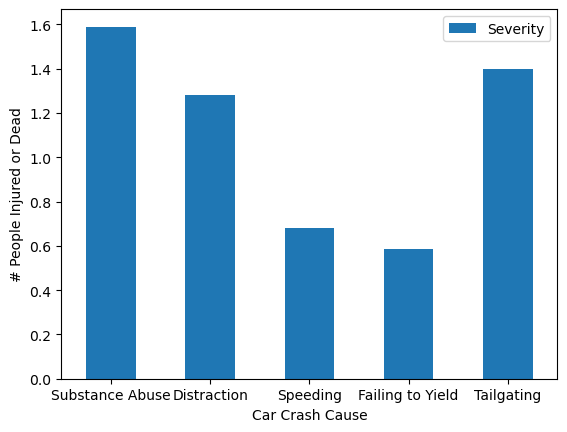

In [47]:
# Since we were a bit suprised at the low substance involvement we decided to check if the severity of the crash would still be higher if the 
# cause of the crash was due to the substance usage

print("Severity Rate for Substance Abuse " + str(totalCasIntox/numIntoxCase))
print("Severity Rate for Driver Distraction " + str(totalCasDistract/numDistractCase))
print("Severity Rate for Speeding " + str(totalCasSpeed/numStopCase))
print("Severity Rate for failing to Yield " + str(totalCasStop/numDistractCase))
print("Severity Rate for Tailgating " + str(totalCasTailing/numTailingCase))

bar_df = pd.DataFrame({"Causes":["Substance Abuse", "Distraction", "Speeding", "Failing to Yield", "Tailgating"], 
                       'Severity':[totalCasIntox/numIntoxCase, totalCasDistract/numDistractCase, totalCasSpeed/numStopCase, 
                                  totalCasStop/numDistractCase, totalCasTailing/numTailingCase]})

bar = bar_df.plot.bar(x="Causes", y="Severity", rot=0)
bar.set_ylabel("# People Injured or Dead")
bar.set_xlabel("Car Crash Cause")


Even if substance involvement does not have a higher percentage in causes of accidents it does, however as seen above, have the highest severity in injuring or killing people than all the other causes

<>:24: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:24: SyntaxWarning:

"is" with a literal. Did you mean "=="?

/var/folders/7h/zntvw7_j3rd1yjbb1w1q449h0000gn/T/ipykernel_56261/424963999.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7h/zntvw7_j3rd1yjbb1w1q449h0000gn/T/ipykernel_56261/424963999.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7h/zntvw7_j3rd1yjbb1w1q449h0000gn/T/ipykernel_56261/424963999.py:24: SyntaxWarning:

"is" with a literal. Did you me

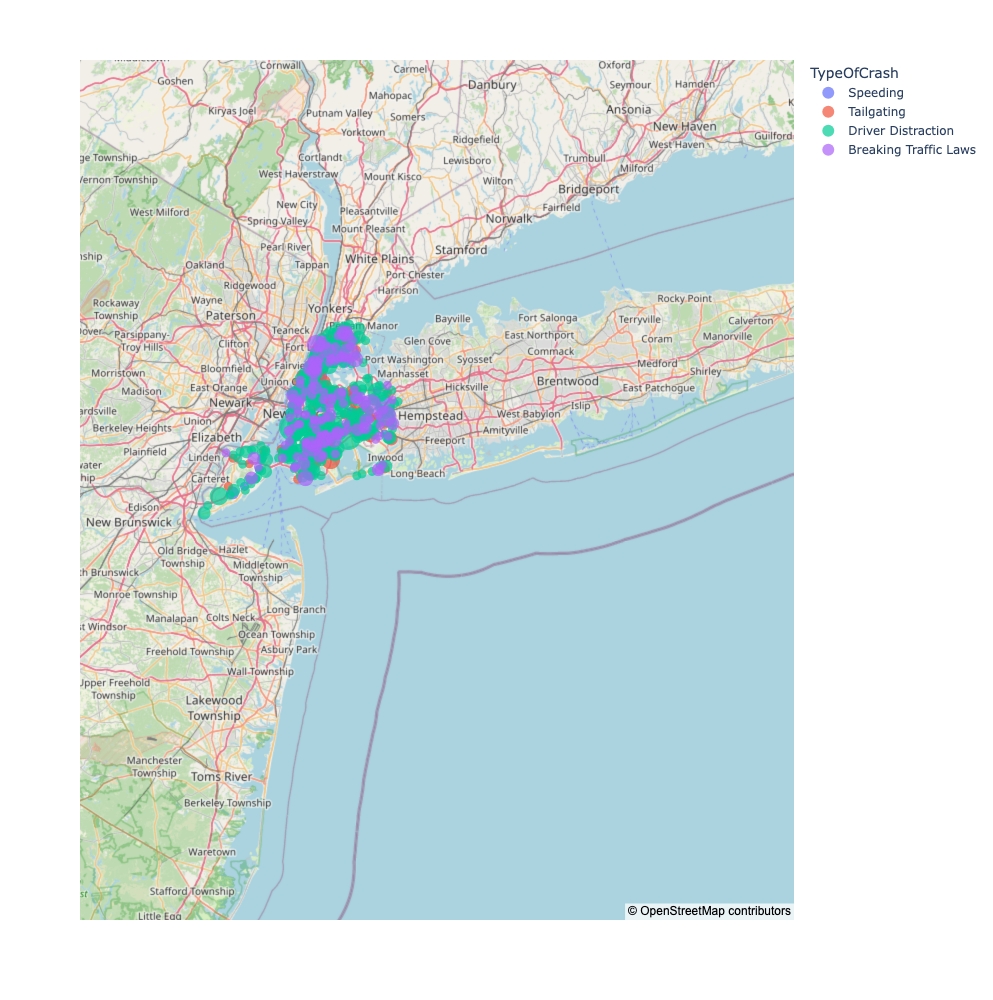

In [48]:
loc_modified_data = modified_data[modified_data['LOCATION'].notna()] # get rows that have a complete cords
loc_modified_data['sumPersons'] = loc_modified_data['NUMBER OF PERSONS INJURED'] + loc_modified_data['NUMBER OF PERSONS KILLED']

typeCrash = []

for index, row in loc_modified_data.iterrows():
    if row["CONTRIBUTING FACTOR VEHICLE 1"]  == "Alcohol Involvement" or row["CONTRIBUTING FACTOR VEHICLE 1"] == "Drugs (illegal)":
        typeCrash.append("Substance Abuse")
    if row["CONTRIBUTING FACTOR VEHICLE 1"] == "Driver Inattention/Distraction":
        typeCrash.append("Driver Distraction")
    if row["CONTRIBUTING FACTOR VEHICLE 1"] == "Unsafe Speed":
        typeCrash.append("Speeding")
    if row["CONTRIBUTING FACTOR VEHICLE 1"] == "Failure to Yield Right-of-Way":
        typeCrash.append("Breaking Traffic Laws")
    if row["CONTRIBUTING FACTOR VEHICLE 1"] == "Following Too Closely":
        typeCrash.append("Tailgating")
    else:
        typeCrash.append(None)
        # since we want to just focus on the four main causes we will place nulls for the other causes to make our map more readable 

loc_modified_data["TypeOfCrash"] = pd.Series(typeCrash)
loc_modified_data = loc_modified_data[loc_modified_data['TypeOfCrash'].notna()]

fig = px.scatter_mapbox(loc_modified_data, lat="LATITUDE", lon="LONGITUDE", hover_name= "BOROUGH" if "BOROUGH" is None else "ON STREET NAME",
                        hover_data=["CRASH DATE", "CRASH TIME"],
                        color = "TypeOfCrash",
                        size="sumPersons",
                        height=1000,
                        width=1000) # if we hove over one of the points we want to see the meta data of the crash like where and when it happened

fig.update_layout(mapbox_style="open-street-map")
fig.show()

Immediately, we can see a few important patterns. First, breaking traffic laws and tailgating causes are most concentrated on inner city roads, not highways or freeways. This makes sense because inner NYC has many pedestrians and cyclists who are susceptible to cars not yielding or cars that are in a rush to get from one place to another and thus are tailgating relatively slower vehicles. Driver distraction does not seem to have a concentrated hotspot occurring in the city's financial and residential districts. Lastly, it is clear that substance abuse and speeding accidents are found on major speedways, which makes sense but also seems concentrated around the downtown areas of the boroughs, such as the Bronx and Brooklyn.

In [49]:


# since we have categorical data we will do a one hot encoding so we apply our models
one_hot_encoded_data = modified_data
one_hot_encoded_data['sumPersons'] = one_hot_encoded_data['NUMBER OF PERSONS INJURED'] + one_hot_encoded_data['NUMBER OF PERSONS KILLED']

# since we have a lot of unique reasons for car crash we will group those that are insignificant to get a top 5
top5 = one_hot_encoded_data["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()[:10].index

one_hot_encoded_data.loc[~one_hot_encoded_data["CONTRIBUTING FACTOR VEHICLE 1"].isin(top5), "CONTRIBUTING FACTOR VEHICLE 1"] = "Misc"

one_hot_encoded_data = pd.get_dummies(one_hot_encoded_data, columns = ["CONTRIBUTING FACTOR VEHICLE 1"], dtype=int) 

one_hot_encoded_data["hasInjury"] = np.where(one_hot_encoded_data["sumPersons"] > 0, 1, 0)
# we also want to make sure our injury event is just either 1 for it happended or 0 if no injuries occurred


one_hot_encoded_data.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way,CONTRIBUTING FACTOR VEHICLE 1_Following Too Closely,CONTRIBUTING FACTOR VEHICLE 1_Misc,CONTRIBUTING FACTOR VEHICLE 1_Other Vehicular,CONTRIBUTING FACTOR VEHICLE 1_Passing Too Closely,CONTRIBUTING FACTOR VEHICLE 1_Passing or Lane Usage Improper,CONTRIBUTING FACTOR VEHICLE 1_Traffic Control Disregarded,CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed,CONTRIBUTING FACTOR VEHICLE 1_Unspecified,hasInjury
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2.0,0.0,...,0,0,1,0,0,0,0,0,0,1
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
# Separate the date, time, and the reasons for crashing of the primary and secondary vehicles as our features and the injury event as the target

features = one_hot_encoded_data[["CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way", "CONTRIBUTING FACTOR VEHICLE 1_Following Too Closely",
                      "CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed"]]
features2 = one_hot_encoded_data[["CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way"]]
features3 = one_hot_encoded_data[["CONTRIBUTING FACTOR VEHICLE 1_Following Too Closely"]]
features4 = one_hot_encoded_data[["CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed"]]

target = one_hot_encoded_data["hasInjury"] 

# Train test split the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=70)

x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(features2, target, test_size=0.2, random_state=70)

x_3_train, x_3_test, y_3_train, y_3_test = train_test_split(features3, target, test_size=0.2, random_state=70)

x_4_train, x_4_test, y_4_train, y_4_test = train_test_split(features4, target, test_size=0.2, random_state=70)

We will be using these these two models: Logistic Regression and KNearestNeighbors

In [51]:
# since we are doing classification we use Logistic
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
pred_train = logistic_model.predict(x_train)
pred_test = logistic_model.predict(x_test)

print("Training Accuracy for all 3 Features: ", accuracy_score(y_train, pred_train))
print("Test Accuracy for all 3 Features: ", accuracy_score(y_test, pred_test))

print("##########")
logistic_model2 = LogisticRegression()
logistic_model2.fit(x_2_train, y_2_train)
pred_2_train = logistic_model2.predict(x_2_train)
pred_2_test = logistic_model2.predict(x_2_test)

print("Training Accuracy for Yielding Feature: ", accuracy_score(y_2_train, pred_2_train))
print("Test Accuracy for Yielding Feature: ", accuracy_score(y_2_test, pred_2_test))
print("##########")
logistic_model3 = LogisticRegression()
logistic_model3.fit(x_3_train, y_3_train)
pred_3_train = logistic_model3.predict(x_3_train)
pred_3_test = logistic_model3.predict(x_3_test)

print("Training Accuracy for Tailgating Feature: ", accuracy_score(y_3_train, pred_3_train))
print("Test Accuracy for Tailgating Feature: ", accuracy_score(y_3_test, pred_3_test))
print("##########")
logistic_model4 = LogisticRegression()
logistic_model4.fit(x_4_train, y_4_train)
pred_4_train = logistic_model4.predict(x_4_train)
pred_4_test = logistic_model4.predict(x_4_test)

print("Training Accuracy for Speeding Feature: ", accuracy_score(y_4_train, pred_4_train))
print("Test Accuracy for Speeding Feature: ", accuracy_score(y_4_test, pred_4_test))

Training Accuracy for all 3 Features:  0.6615
Test Accuracy for all 3 Features:  0.6746666666666666
##########
Training Accuracy for Yielding Feature:  0.6615
Test Accuracy for Yielding Feature:  0.6746666666666666
##########
Training Accuracy for Tailgating Feature:  0.6506666666666666
Test Accuracy for Tailgating Feature:  0.658
##########
Training Accuracy for Speeding Feature:  0.6506666666666666
Test Accuracy for Speeding Feature:  0.658


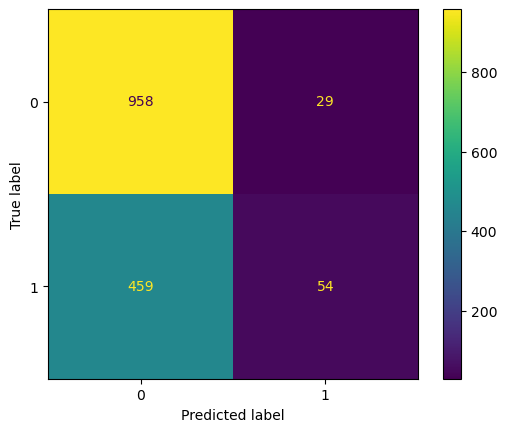

In [52]:
# Error Analysis on the first logistic model
matrix = confusion_matrix(y_test, pred_test)
display = ConfusionMatrixDisplay(confusion_matrix=matrix,
                             display_labels=logistic_model.classes_)
display.plot()
plt.show()

In [53]:
# Used confusion matrix to find sensitivity, specificity, accuracy, error, and precision
# We got the numbers from the matrix
print("sensitivity:", 958 / (958 + 29))
print("specificity:", 54 / (54 + 459))
print("accuracy:", (958 + 54) / (958 + 29 + 459 + 54))
print("error:", (459 + 29) / (958 + 29 + 459 + 54))
print("precision:", 958 / (958 + 459))

sensitivity: 0.9706180344478217
specificity: 0.10526315789473684
accuracy: 0.6746666666666666
error: 0.3253333333333333
precision: 0.6760762173606211


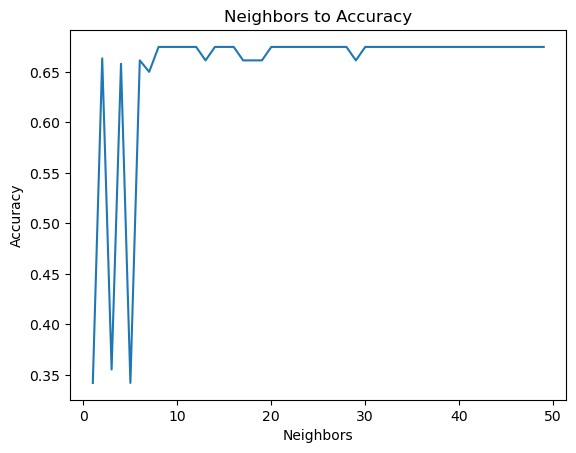

In [54]:

# Here we want to find the best n for our neighbors so we will graph neighbors to accuracy from n from 1 to 50
x = []
modelAcc = []
for i in range(1,50):
    model = KNeighborsClassifier(i)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    x.append(i)
    modelAcc.append(accuracy_score(y_test, prediction))
    
plt.plot(x,modelAcc)
plt.title("Neighbors to Accuracy") 
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()    

Now that we know our best accuracy occurs at 8 neighbors we will use that for the model

In [55]:
knn_model = KNeighborsClassifier(n_neighbors= 8)
knn_model.fit(x_train, y_train)
knn_prediction = knn_model.predict(x_test)

print("Training Accuracy: ", accuracy_score(y_train, pred_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_test))

Training Accuracy:  0.6615
Test Accuracy:  0.6746666666666666


Both the logistic and the kNN models provide similar test and training accuracy. 

Our final model will be a Support Vector Machine to find a normal vector that encapsulates the points in our data set. We will not use a Perceptron because our data is not linearly seperable. Since we already have above two models, we decided to just atttempt to use the SVM on our dataset and play around with adjusting the kernel and gamma which adjusted the inlfuence of each indiviual training example.

In [ ]:
svm_train = pd.concat([x_train, y_train], axis=1)

predictions = []
accuracies = []
m = 75
for i in range(m):
    svm_bootstrap = svm_train.sample(frac=1,replace=True,random_state=42+i)
    x_b = svm_bootstrap.iloc[:, :3]
    y_b = svm_bootstrap.iloc[:,3]
    classifier = SVC(C=1, 
                 decision_function_shape='ovr',  # here we tried the different kernels even trying sigmoid and then altering the gama from 1 to 0.1 to 0.01
                     gamma=0.001, kernel='rbf', 
                     random_state=1234)
    classifier.fit(x_b,y_b)
    prediction = classifier.predict(x_train)
    sumY = np.sum(y_train == (prediction>=0.5))
    accuracy = sumY / len(one_hot_encoded_data)
    accuracies.append(accuracy)
    predictions.append(prediction)

total_predictions = predictions[0]

for i in range(1,m):
    total_predictions = total_predictions + predictions[i]

bootstrap_preds = (total_predictions / m) >= 0.5


np.sum(y_train == bootstrap_preds) / len(one_hot_encoded_data)


Conclusion:

The first visualization indicates two main points. The first is that driving under the influence is not common; surprisingly, compared to distracted driving, it does not cause as many injuries to other people. However, it is important to further understand that the instances of driving under the influence are less common but still just as dangerous, as seen in the bar graph. Driver inattention, the highest cause of mortality and injury, makes sense because it encapsulates many dangerous behaviors while driving, such as texting, not checking all mirrors, and being distracted by other events inside the car. Breaking traffic laws and tailgating causes being concentrated on inner city roads and not highways or freeways is reasonable because inner NYC has many pedestrians and cyclists who are susceptible to cars not yielding. Driver distraction seems to not have a concentrated hotspot occuring both in the city's financial and residential districts. Lastly, it is clear that substance abuse and speeding accidents are found on major speedways and downtown in the various boroughs. These visualizations affirm the hypothesis to an extent because there is juxtaposition in the location and concentration of certain causes of car accidents.

There were two applications of machine learning models in this project. The first is logistic regressions on three of the most common occurrences of car crashes. Before delving into the results, it was also important as a form of data manipulation that the categorical values be hot encoded into numerical data to apply the regression. Furthermore, since this was a classification problem, linear regression would not be applied. The model's accuracy was around 70% on both the training and test, which was given special attention since we did not want under- or overfitting. We also think our accuracy was a bit lower because the casualties would also depend on the type of street (highway or a narrow residential intersection, for example). Since the data did not give us classifications on whether the street was a major roadway or not, we could not train our model on such data. Furthemore, we also tried to tune the model following our error analysis in the confusion matrix. 

Our application of kNN classifiers reaffirmed our accuracy as we even tested over varying number of neighbors. Lastly, in terms of our Support Vector Machine we achieved a lower accuracy even after adjusting the curvature and kernel coefficient. We believe the low accuracy may have to do with the fact that data set is too large and unbalanced forcing the hyperplanes to skew. 


From this analysis it is clear that violation of traffic laws over other causes leads to the most amount of injuries and deaths of other people. Yielding in particular makes sense as the leading cause in New York City given the number of intersections and the fact that New York also has many pedestrians. This does not align with our hypothesis however there may have been bias when devising the hypothesis since much of the education on driving is focused on not being under the influence while operating a vehicle. In the future, it would be interesting to apply classification models and other ML models that would take into account possibly the vehicle's car type and the road type to improve accuracy.